
Final Classification Model (Random Forest):
Accuracy: 0.629

Classification Report:
              precision    recall  f1-score   support

           0      0.665     0.807     0.730      1293
           1      0.568     0.517     0.541      1020
           2      0.500     0.009     0.018       110
           3      0.500     0.018     0.034        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5

    accuracy                          0.629      2501
   macro avg      0.319     0.193     0.189      2501
weighted avg      0.609     0.629     0.599      2501


Predictions for new data: [9 9 9]
Hand 1: Predicted class 9, top-3 confidences:
   Rank 9: 0.650
   Rank 1: 0.120
   Rank 5: 0.110

Hand 2: Predicted class 9, top-3 confidences:
   Rank 9: 0.680
   Rank 0: 0.170
   Rank 1: 0.100

Hand 3: Predicted class 9, top-3 confidences:
   Rank 9: 0.720
   Rank 1: 0.150
   Rank

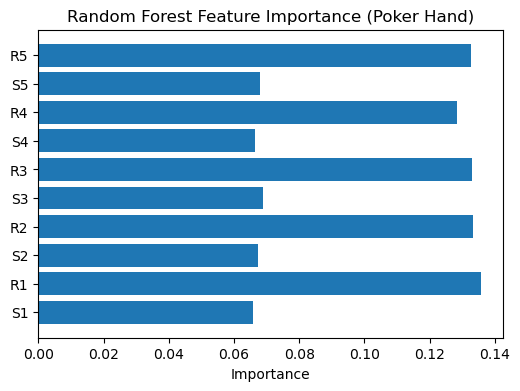

In [6]:
# !################################
# Import necessary libraries
# !################################
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# !################################
# Import necessary libraries
# !################################
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # <-- changed here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# !################################
# Data Loading
# !################################
poker_df = pd.read_csv('poker-hand-training-true.data')

poker_df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5','ORD']]

# !################################
# Test Train Split
# !################################
X = poker_df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5']]
y = poker_df['ORD']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# !################################
# Train Random Forest Model
# !################################
rf_final = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # expand fully
    random_state=42,
    n_jobs=-1
)
rf_final.fit(X_train_scaled, y_train)

# !################################
# Prediction and Evaluation
# !################################
predictions = rf_final.predict(X_test_scaled)
print("\nFinal Classification Model (Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, digits=3))

# !################################
# Predict on new 5-card hands
# !################################
new_data = pd.DataFrame({
    'S1': [1, 2, 4],
    'R1': [10, 11, 1],
    'S2': [1, 2, 4],
    'R2': [11, 13, 13],
    'S3': [1, 2, 4],
    'R3': [13, 10, 12],
    'S4': [1, 2, 4],
    'R4': [12, 12, 11],
    'S5': [1, 2, 4],
    'R5': [1, 1, 10]
})

new_data_scaled = scaler.transform(new_data)
new_predictions = rf_final.predict(new_data_scaled)
new_probabilities = rf_final.predict_proba(new_data_scaled)

print("\nPredictions for new data:", new_predictions)
for i, (pred, probs) in enumerate(zip(new_predictions, new_probabilities)):
    top3 = sorted(list(zip(range(len(probs)), probs)), key=lambda x: x[1], reverse=True)[:3]
    print(f"Hand {i+1}: Predicted class {pred}, top-3 confidences:")
    for cls, pr in top3:
        print(f"   Rank {cls}: {pr:.3f}")
    print()

# !################################
# Feature importance (optional visualization)
# !################################
importances = rf_final.feature_importances_
plt.figure(figsize=(6,4))
plt.barh(X.columns, importances)
plt.title("Random Forest Feature Importance (Poker Hand)")
plt.xlabel("Importance")
plt.show()


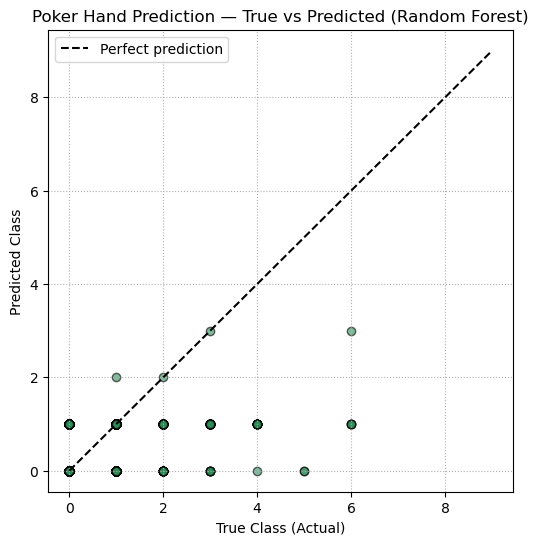

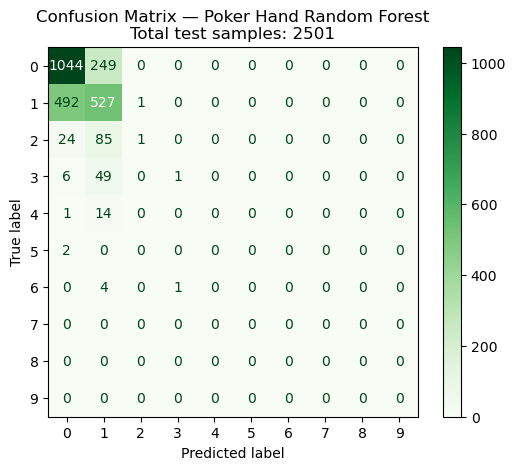


✅ Random Forest Evaluation Summary:
Accuracy: 0.629
F1 (macro): 0.189
F1 (weighted): 0.599

Classification Report:
              precision    recall  f1-score   support

           0      0.665     0.807     0.730      1293
           1      0.568     0.517     0.541      1020
           2      0.500     0.009     0.018       110
           3      0.500     0.018     0.034        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5

    accuracy                          0.629      2501
   macro avg      0.319     0.193     0.189      2501
weighted avg      0.609     0.629     0.599      2501



In [7]:
# ============================================================
# 📊 Visualization and Evaluation — Random Forest (Same as KNN Style)
# ============================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# --- 1️⃣ Scatter Plot: True vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.6, color='seagreen', edgecolors='k')
plt.plot([0,9], [0,9], 'k--', label='Perfect prediction')
plt.xlabel("True Class (Actual)")
plt.ylabel("Predicted Class")
plt.title("Poker Hand Prediction — True vs Predicted (Random Forest)")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

# --- 2️⃣ Confusion Matrix ---
cm = confusion_matrix(y_test, predictions, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Greens", values_format='d')
plt.title(f"Confusion Matrix — Poker Hand Random Forest\nTotal test samples: {len(y_test)}")
plt.show()

# --- 3️⃣ Accuracy & F1-scores ---
acc = accuracy_score(y_test, predictions)
f1_macro = f1_score(y_test, predictions, average='macro')
f1_weighted = f1_score(y_test, predictions, average='weighted')

print("\n✅ Random Forest Evaluation Summary:")
print(f"Accuracy: {acc:.3f}")
print(f"F1 (macro): {f1_macro:.3f}")
print(f"F1 (weighted): {f1_weighted:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, digits=3))
